# Model Development: Random Forest for NYC Airbnb Prices

This notebook loads the cleaned listings data, constructs features, trains a Random Forest regressor, evaluates with MAE and SMAPE, shows the top-10 feature importances, and saves the trained model.


In [5]:
# Imports and data path
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure project root (one level up from this notebook) is on sys.path
THIS_NOTEBOOK_DIR = Path.cwd()
POSSIBLE_ROOTS = [THIS_NOTEBOOK_DIR, THIS_NOTEBOOK_DIR.parent]
for root in POSSIBLE_ROOTS:
    src_path = root / 'src'
    if src_path.exists() and str(root) not in sys.path:
        sys.path.insert(0, str(root))
        break

from src.model import load_clean_data, make_features, train_random_forest, evaluate, save

# Prefer cleaned CSV saved by 01_data_explore.ipynb, with sensible fallbacks
candidate_paths = [
    Path('notebooks/data/clean/listings.csv'),
    Path('data/clean/listings.csv'),
    Path('../notebooks/data/clean/listings.csv'),
    Path('data/listings.csv.gz'),
    Path('../data/listings.csv.gz'),
]
DATA_PATH = next((p for p in candidate_paths if p.exists()), candidate_paths[0])
print('Using data at:', DATA_PATH.resolve())


Using data at: F:\Documents\Jobhunt\Projects\Airbnb nightly\notebooks\data\clean\listings.csv


In [6]:
# Load, build features, split, train
from sklearn.model_selection import train_test_split

df = load_clean_data(str(DATA_PATH))
X, y = make_features(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

model = train_random_forest(X_train, y_train, random_state=42)

metrics = evaluate(model, X_test, y_test)
print('Metrics:', metrics)


Metrics: {'mae': 77.93476791496182, 'smape': 0.332323453309985}


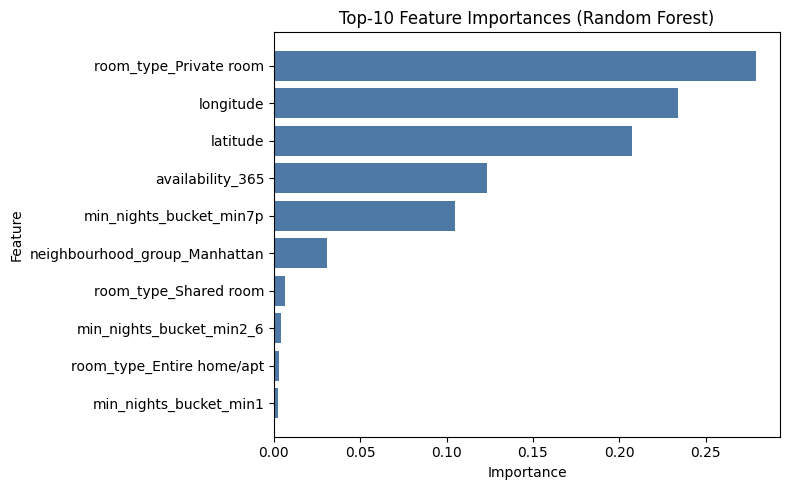

In [7]:
# Feature importance: top-10 bar plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rf = model.named_steps['model']
importances = rf.feature_importances_
feature_names = X.columns.to_list()

imp_df = (
    pd.DataFrame({'feature': feature_names, 'importance': importances})
    .sort_values('importance', ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(imp_df['feature'][::-1], imp_df['importance'][::-1], color='#4e79a7')
ax.set_title('Top-10 Feature Importances (Random Forest)')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')
plt.tight_layout()
plt.show()


In [8]:
# Save the trained model
out_path = save(model, path='models/rf_price.pkl')
print('Model saved to:', out_path)


Model saved to: models\rf_price.pkl
